### Import Libraries

In [1]:
import torch
import numpy as np
from LISTA_model import LISTA_train, LISTA_test
import time
import torch.nn as nn
import Newest_util
import matplotlib.pyplot as plt

In [2]:
sparsity = 3
n = 100
m = 30
numTrain = 30000
numTest = 3000

sigma_lst = [1.006, 0.565, 0.318, 0.179, 0.101, 0.057, 0.032, 0.018, 0.010, 0.006]
seed = 80
np_seed = np.random.RandomState(seed)
generator = Newest_util.datagen(n, m, sparsity, np_seed)
A = generator.generate_measurement_matrix()

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
learning_rate = 5e-4
numEpochs = 25
numLayers = 15

loss_function = nn.MSELoss()

### SNR=5dB

In [3]:
X_train1, Y_train1, sigma1 = generator.data_gen(A, numTrain, [sigma_lst[0]])
X_test1, Y_test1, sigma1 = generator.data_gen(A, numTest, [sigma_lst[0]])

In [4]:
start = time.time()

net1 = LISTA_train(X_train1, Y_train1[0], A, numEpochs, numLayers, device, learning_rate, sigma1[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net1.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.6945599913597107
Training - Epoch: 2, Loss: 0.35723355412483215
Training - Epoch: 3, Loss: 0.2613244354724884
Training - Epoch: 4, Loss: 0.20093916356563568
Training - Epoch: 5, Loss: 0.15959328413009644
Training - Epoch: 6, Loss: 0.1308811455965042
Training - Epoch: 7, Loss: 0.10745396465063095
Training - Epoch: 8, Loss: 0.08952856808900833
Training - Epoch: 9, Loss: 0.07619807869195938
Training - Epoch: 10, Loss: 0.06430840492248535
Training - Epoch: 11, Loss: 0.05423978716135025
Training - Epoch: 12, Loss: 0.04726477339863777
Training - Epoch: 13, Loss: 0.04311409220099449
Training - Epoch: 14, Loss: 0.03913722559809685
Training - Epoch: 15, Loss: 0.03605085238814354
Training - Epoch: 16, Loss: 0.03282662853598595
Training - Epoch: 17, Loss: 0.029666921123862267
Training - Epoch: 18, Loss: 0.026694348081946373
Training - Epoch: 19, Loss: 0.023981580510735512
Training - Epoch: 20, Loss: 0.02243120037019

C:\Users\Akshay Verma\AppData\Local\Temp\ipykernel_22384\3418673392.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  print('Threshold is ', net1.thr.T)


In [5]:
X_est1 = LISTA_test(net1, Y_test1[0], A, device, [sigma1[0]]*3000)
X_est1 = X_est1.T
l1=loss_function(torch.tensor(X_est1),torch.tensor(X_test1))
l2=loss_function(torch.tensor(X_test1),torch.zeros_like(torch.tensor(X_test1)))
dbloss = l1.item()/l2.item()
mse1 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test1.T, X_est1.T)])
hr1 = np.mean(hr_list)

In [6]:
print(f"MSE = {mse1:.3f}dB\nHit Rate = {hr1:.2f}%")

MSE = 1.337dB
Hit Rate = 85.77%


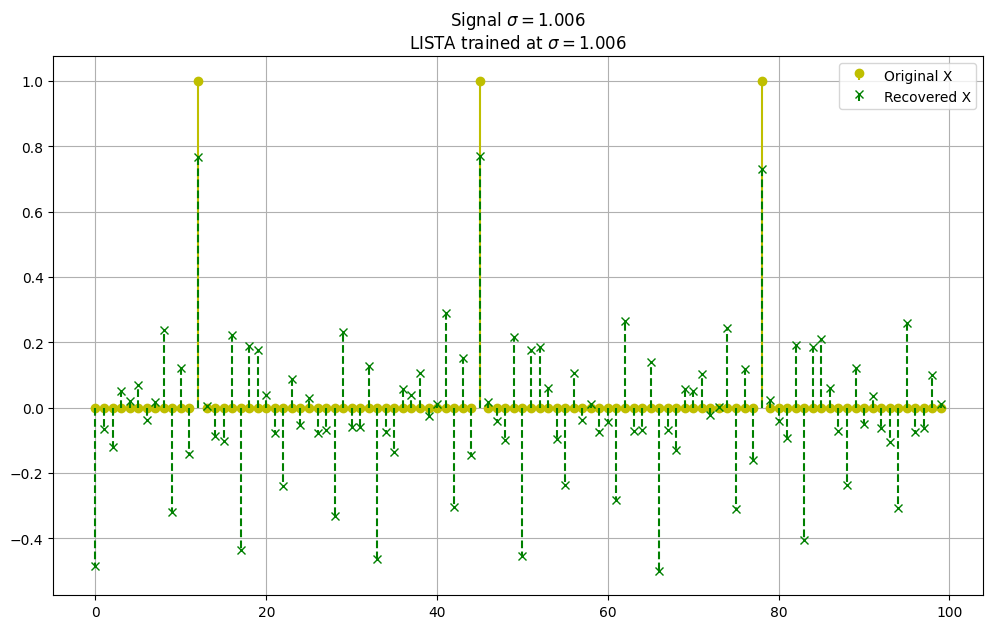

In [7]:
plotter = Newest_util.plotter()
plotter.stem_plot(X_test1, X_est1, sigma1[0], sigma1[0], 50)

### SNR=15dB

In [4]:
X_train2, Y_train2, sigma2 = generator.data_gen(A, numTrain, [sigma_lst[2]])
X_test2, Y_test2, sigma2 = generator.data_gen(A, numTest, [sigma_lst[2]])

In [22]:
start = time.time()

net2 = LISTA_train(X_train2, Y_train2[0], A, numEpochs, numLayers, device, learning_rate, sigma2[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net2.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.6007305383682251
Training - Epoch: 2, Loss: 0.32958322763442993
Training - Epoch: 3, Loss: 0.2518041133880615
Training - Epoch: 4, Loss: 0.20428000390529633
Training - Epoch: 5, Loss: 0.1740780770778656
Training - Epoch: 6, Loss: 0.15054063498973846
Training - Epoch: 7, Loss: 0.1313832849264145
Training - Epoch: 8, Loss: 0.11900079250335693
Training - Epoch: 9, Loss: 0.10964011400938034
Training - Epoch: 10, Loss: 0.1032872200012207
Training - Epoch: 11, Loss: 0.09027652442455292
Training - Epoch: 12, Loss: 0.0868053138256073
Training - Epoch: 13, Loss: 0.0784137099981308
Training - Epoch: 14, Loss: 0.07438888400793076
Training - Epoch: 15, Loss: 0.07093948125839233
Training - Epoch: 16, Loss: 0.0675245001912117
Training - Epoch: 17, Loss: 0.06433476507663727
Training - Epoch: 18, Loss: 0.06149459257721901
Training - Epoch: 19, Loss: 0.05890269577503204
Training - Epoch: 20, Loss: 0.056968580931425095
Tra

C:\Users\Akshay Verma\AppData\Local\Temp\ipykernel_10132\540613091.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  print('Threshold is ', net2.thr.T)


In [23]:
X_est2 = LISTA_test(net2, Y_test2[0], A, device, [sigma2[0]]*3000)
X_est2 = X_est2.T
l1=loss_function(torch.tensor(X_est2),torch.tensor(X_test2))
l2=loss_function(torch.tensor(X_test2),torch.zeros_like(torch.tensor(X_test2)))
dbloss = l1.item()/l2.item()
mse2 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test2.T, X_est2.T)])
hr2 = np.mean(hr_list)

In [24]:
print(f"MSE = {mse2:.3f}dB\nHit Rate = {hr2:.2f}%")

MSE = -2.028dB
Hit Rate = 97.04%


In [27]:
plotter = Newest_util.plotter()

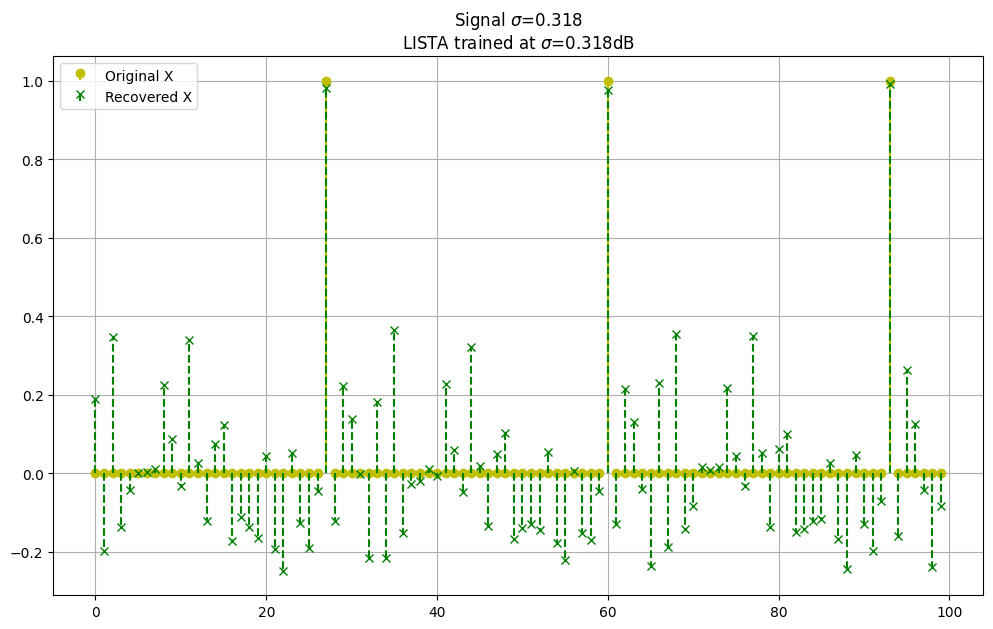

In [28]:
plotter.stem_plot(X_test2, X_est2, sigma2[0], sigma2[0], 50)

### SNR=30dB

In [5]:
X_train_3, Y_train_3, sigma3 = generator.data_gen(A, numTrain, [sigma_lst[5]])
X_test_3, Y_test_3, sigma3 = generator.data_gen(A, numTest, [sigma_lst[5]])

In [9]:
start = time.time()

net_30 = LISTA_train(X_train_3, Y_train_3[0], A, numEpochs, numLayers, device, learning_rate, sigma3[0])
print(f'time taken is {time.time() - start}')
print('Threshold is ', net_30.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 1, Loss: 0.7531781792640686
Training - Epoch: 2, Loss: 0.5077486038208008
Training - Epoch: 3, Loss: 0.4411681294441223
Training - Epoch: 4, Loss: 0.3791205585002899
Training - Epoch: 5, Loss: 0.3457293212413788
Training - Epoch: 6, Loss: 0.31931450963020325
Training - Epoch: 7, Loss: 0.29729408025741577
Training - Epoch: 8, Loss: 0.28342023491859436
Training - Epoch: 9, Loss: 0.27645257115364075
Training - Epoch: 10, Loss: 0.26470449566841125
Training - Epoch: 11, Loss: 0.24889391660690308
Training - Epoch: 12, Loss: 0.27055972814559937
Training - Epoch: 13, Loss: 0.22418920695781708
Training - Epoch: 14, Loss: 0.21231187880039215
Training - Epoch: 15, Loss: 0.20945018529891968
Training - Epoch: 16, Loss: 0.20679312944412231
Training - Epoch: 17, Loss: 0.2038181722164154
Training - Epoch: 18, Loss: 0.20176880061626434
Training - Epoch: 19, Loss: 0.19879934191703796
Training - Epoch: 20, Loss: 0.1953137218952179
Tra

In [10]:
X_est_3 = LISTA_test(net_30, Y_test_3[0], A, device, [sigma3[0]]*3000)
X_est_3 = X_est_3.T
l1=loss_function(torch.tensor(X_est_3),torch.tensor(X_test_3))
l2=loss_function(torch.tensor(X_test_3),torch.zeros_like(torch.tensor(X_test_3)))
dbloss = l1.item()/l2.item()
mse_3 = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test_3.T, X_est_3.T)])
hr_3 = np.mean(hr_list)

In [12]:
print(f"MSE = {mse_3:.3f}dB\nHit Rate = {hr_3:.2f}%")

MSE = -30.387dB
Hit Rate = 100.00%


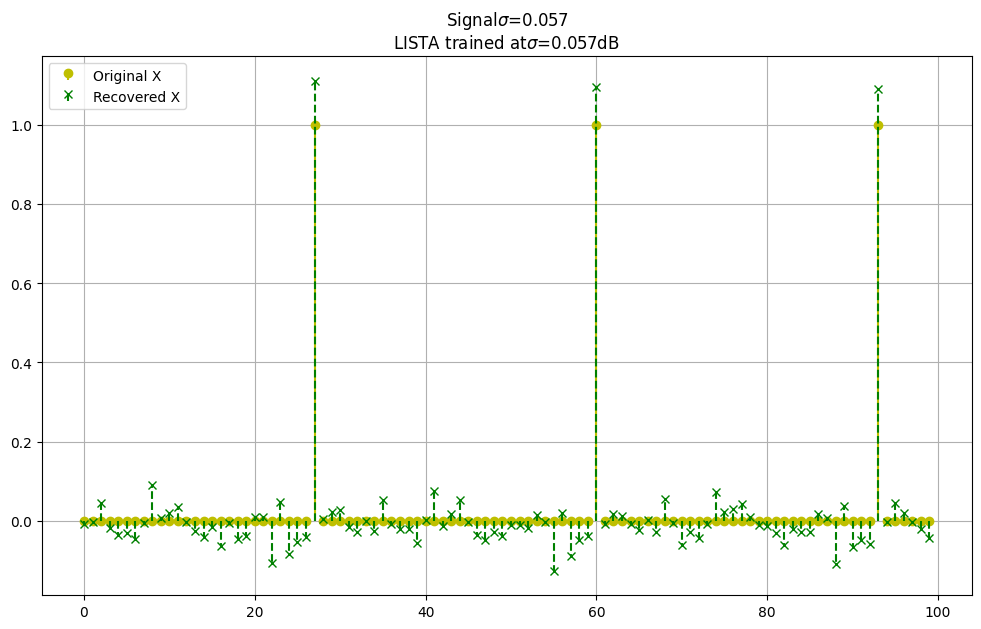

In [15]:
plotter.stem_plot(X_test_3, X_est_3, sigma3[0], sigma3[0], 50)

### Mixed

In [18]:
def data_mix(seed, x1, y1, sigma1, x2, y2, sigma2, x3, y3, sigma3):
    l = x1.shape[1]
    sel = l//3

    sigma1, sigma2, sigma3 = np.array(sigma1), np.array(sigma2), np.array(sigma3)
    
    idx1 = seed.choice(l, sel, replace=False)
    idx2 = seed.choice(l, sel, replace=False)
    idx3 = seed.choice(l, sel, replace=False)
    
    x_mixed = np.concatenate((x1[:,idx1], x2[:,idx2], x3[:,idx3]), axis=1)
    y_mixed = np.concatenate((y1[:,idx1], y2[:,idx2], y3[:,idx3]), axis=1)
    sigma_mixed = np.concatenate((sigma1[idx1], sigma2[idx2], sigma3[idx3]))
    
    indices = np.arange(x_mixed.shape[1])
    np.random.shuffle(indices)
    X_mixed = x_mixed[:, indices]
    Y_mixed = y_mixed[:, indices]
    Sigma_mixed = sigma_mixed[indices]
    
    return X_mixed, Y_mixed, Sigma_mixed

In [19]:
seed_mixed = 10
# alpha_mixed = torch.tensor([[0.1132, 0.0616, 0.1100, 0.1029, 0.1028, 0.1041, 0.1061, 0.1080, 0.1095,0.1108, 0.1119, 0.1128, 0.1136, 0.1143, 0.1149]]).T
np_seed_mixed = np.random.RandomState(seed_mixed)
X_train_mixed, Y_train_mixed, sigma_train_mixed = data_mix(np_seed_mixed, X_train1, Y_train1[0], [sigma1[0]]*30000, X_train2, Y_train2[0], [sigma2[0]]*30000, X_train_3, Y_train_3[0], [sigma3[0]]*30000)
X_test_mixed, Y_test_mixed, sigma_test_mixed = data_mix(np_seed_mixed, X_test1, Y_test1[0], [sigma1[0]]*3000, X_test2, Y_test2[0], [sigma2[0]]*3000, X_test_3, Y_test_3[0], [sigma3[0]]*3000)

In [21]:
print(X_test_mixed.shape, Y_test_mixed.shape, sigma_test_mixed.shape)

(100, 3000) (30, 3000) (3000,)


In [ ]:
start = time.time()

net_mixed = LISTA_train(X_train_mixed, Y_train_mixed, A, numEpochs, numLayers, device, learning_rate, sigma_train_mixed)
print(f'time taken is {time.time() - start}')
print('Learned threshold is ', net_mixed.thr.T)

Total dataset size is  30000
DataSet size is:  24000
Training - Epoch: 0, Loss: 1.4671661853790283
Training - Epoch: 1, Loss: 1.2905662059783936
Training - Epoch: 2, Loss: 1.2671456336975098
Training - Epoch: 3, Loss: 1.24894118309021
Training - Epoch: 4, Loss: 1.2353241443634033
Training - Epoch: 5, Loss: 1.2247371673583984
Training - Epoch: 6, Loss: 1.2164618968963623
Training - Epoch: 7, Loss: 1.2098723649978638
Training - Epoch: 8, Loss: 1.2025775909423828
Training - Epoch: 9, Loss: 1.1727142333984375
Training - Epoch: 10, Loss: 1.1675344705581665
Training - Epoch: 11, Loss: 1.163694143295288
Training - Epoch: 12, Loss: 1.161179780960083
Training - Epoch: 13, Loss: 1.1592297554016113
Training - Epoch: 14, Loss: 1.153066635131836
Training - Epoch: 15, Loss: 1.12966787815094
Training - Epoch: 16, Loss: 1.1275039911270142
Training - Epoch: 17, Loss: 1.1257683038711548
Training - Epoch: 18, Loss: 1.1241596937179565
Training - Epoch: 19, Loss: 1.12327241897583
Training - Epoch: 20, Loss

In [ ]:
X_est_mixed = LISTA_test(net_mixed, Y_test_mixed, A, device)
l1=loss_function(torch.tensor(X_est_mixed),torch.tensor(X_test_mixed))
l2=loss_function(torch.tensor(X_test_mixed),torch.zeros_like(torch.tensor(X_test_mixed)))
dbloss = l1.item()/l2.item()
mse_mixed = np.log(dbloss)*10
hr_list = np.array([np.sum((a != 0) & (np.abs(a - b) <= 0.3)) / np.sum(a != 0) * 100 for a, b in zip(X_test_mixed.T, X_est_mixed.T)])
hr_mixed = np.mean(hr_list)

In [ ]:
print(f"MSE = {mse_mixed:.3f}dB\nHit Rate = {hr_mixed:.2f}%")

MSE = -5.766dB
Hit Rate = 54.43%


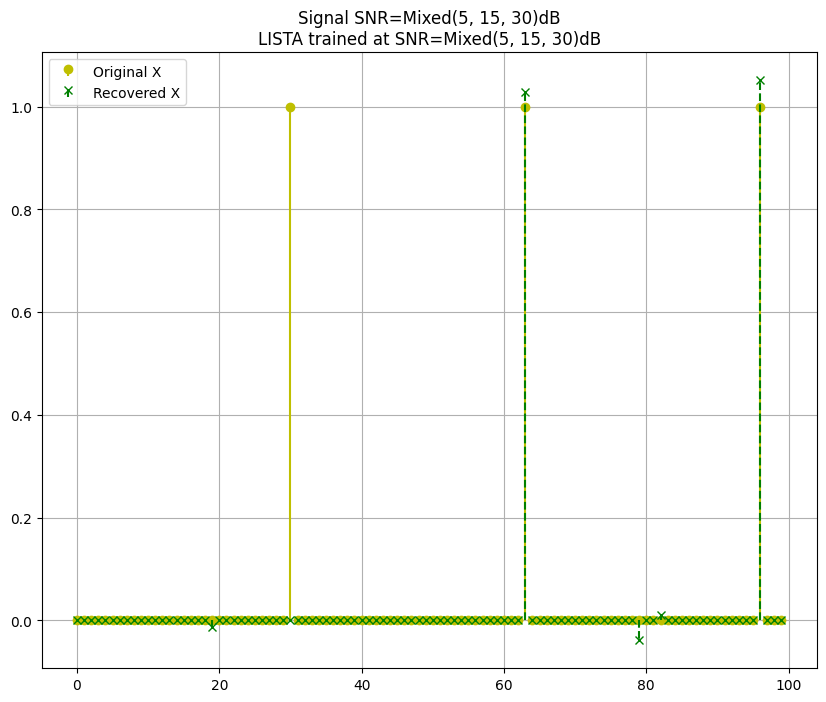

In [ ]:
plotter = Newest_util.plotter()
plotter.stem_plot(X_test_mixed, [X_est_mixed], ["Mixed(5, 15, 30)"], "Mixed(5, 15, 30)", "Mixed(5, 15, 30)", 50)